<a href="https://colab.research.google.com/github/akanshgupta98/Hand-Written-Digit-Recognition/blob/master/MNIST(Pytorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# Loading the Dataset

In [0]:
import torchvision
import torchvision.transforms as transforms

In [0]:
trainset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)


In [0]:
dataiter = iter(trainloader)
images,labels = dataiter.next()
print(images.shape,labels.shape)

torch.Size([4, 1, 28, 28]) torch.Size([4])


In [0]:
classes = (0,1,2,3,4,5,6,7,8,9)

(1, 28, 28)


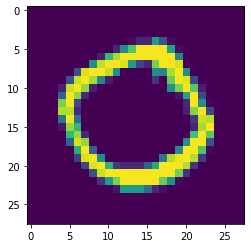

0


In [0]:
image = images[2].numpy()
print(image.shape)
image = np.transpose(image,axes=(1,2,0))
plt.imshow(image.squeeze())
plt.show()
print(classes[labels[2]])

In [0]:
import torch.nn as nn

In [0]:
class FirstCNN(nn.Module):
  
  def __init__(self):

    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(1,8,2) #(N,1,28,28) --> (N,8,27,27)

  def forward(self,x):
    return(self.conv1(x))

In [0]:
net = FirstCNN()
out = net(images)
print(out.shape)

torch.Size([4, 8, 27, 27])


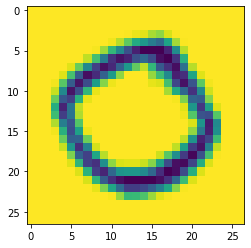

In [0]:
img = out[2,0,:,:].detach().numpy()
plt.imshow(img)
plt.show()

# Deep CNN

In [0]:
class FirstDCNN(nn.Module):

  def __init__(self):
    super(FirstDCNN,self).__init__()

    self.model = nn.Sequential(
        nn.Conv2d(1,8,3), #(N,1,28,28) --> (N,8,26,26)
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2), #(N,8,26,26) --> (N,8,13,13)
        nn.Conv2d(8,16,3), #(N,8,13,13) --> (N,16,11,11) 
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2) #(N,16,11,11) --> (N,16,5,5)
    )

  def forward(self,x):
    x = self.model(x)
    return x

In [0]:
images.shape

torch.Size([4, 1, 28, 28])

In [0]:
net = FirstDCNN()
out = net(images)
print(out.shape)

torch.Size([4, 16, 5, 5])


# LeNet Model

In [0]:
class LeNet(nn.Module):
  
  def __init__(self):
    
    super(LeNet,self).__init__()

    self.model_cnn = nn.Sequential(
        nn.Conv2d(1,6,1), #(N,1,28,28) --> (N,6,28,28)
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2), #(N,6,28,28) -->(N,6,14,14)
        nn.Conv2d(6,16,5), #(N,6,14,14)  --> (N,16,10,10)
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2) #(N,16,10,10) --> (N,16,5,5)
    )

    self.model_fc = nn.Sequential(
        nn.Linear(400,120),
        nn.ReLU(),
        nn.Linear(120,84), 
        nn.ReLU(),
        nn.Linear(84,10) 
    )

  def forward(self,x):
    x = self.model_cnn(x)
    x = x.view(x.size(0),-1)
    x = self.model_fc(x)
    return x


# Loading The Dataset

In [0]:
trainset = torchvision.datasets.MNIST(root='./data',download=True,train=True,transform = transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True)
testset = torchvision.datasets.MNIST(root='./data',download=True,train=False,transform= transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset,batch_size=128)

In [0]:
def evaluation(dataloader):

  total,correct = 0,0
  for data in dataloader:
    inputs,labels = data
    outputs = net(inputs)
    _,y_pred = torch.max(outputs,dim=1)
    total += labels.size(0)
    correct += (y_pred == labels).sum().item()
  return 100 * correct/total
    

In [0]:
net = LeNet()

In [0]:
import torch.optim as optim
opt = optim.Adam(net.parameters())
loss_fn = nn.CrossEntropyLoss()

Epoch: 0/16, Test acc: 96.01, Train acc: 96.17
Epoch: 1/16, Test acc: 96.98, Train acc: 97.36
Epoch: 2/16, Test acc: 97.38, Train acc: 97.97
Epoch: 3/16, Test acc: 97.66, Train acc: 98.46
Epoch: 4/16, Test acc: 97.62, Train acc: 98.45
Epoch: 5/16, Test acc: 97.68, Train acc: 98.65
Epoch: 6/16, Test acc: 97.95, Train acc: 99.06
Epoch: 7/16, Test acc: 98.13, Train acc: 99.33
Epoch: 8/16, Test acc: 97.93, Train acc: 99.30
Epoch: 9/16, Test acc: 98.06, Train acc: 99.43
Epoch: 10/16, Test acc: 98.22, Train acc: 99.45
Epoch: 11/16, Test acc: 97.90, Train acc: 99.41
Epoch: 12/16, Test acc: 98.19, Train acc: 99.59
Epoch: 13/16, Test acc: 98.34, Train acc: 99.75
Epoch: 14/16, Test acc: 98.39, Train acc: 99.72
Epoch: 15/16, Test acc: 98.44, Train acc: 99.78


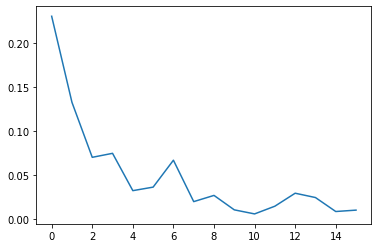

CPU times: user 6min 46s, sys: 6.99 s, total: 6min 53s
Wall time: 6min 54s


In [0]:
%%time
loss_arr = []
loss_epoch_arr = []
epochs = 16

for epoch in range(epochs):

  for i,data in enumerate(trainloader,0):

    inputs,labels = data

    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs,labels)
    loss.backward()

    opt.step()

    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())

  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()
    


# Move to GPU

In [0]:
device = torch.device('cuda:0')

In [0]:
device

device(type='cuda', index=0)

In [0]:
def evaluation(dataloader):

  total,correct = 0,0
  for data in dataloader:
    inputs,labels = data
    inputs,labels = inputs.to(device),labels.to(device)
    outputs = net(inputs)
    _,y_pred = torch.max(outputs,dim=1)
    total += labels.size(0)
    correct += (y_pred == labels).sum().item()
  return 100 * correct/total
    

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 91.41, Train acc: 90.89
Epoch: 1/16, Test acc: 95.59, Train acc: 95.23
Epoch: 2/16, Test acc: 96.92, Train acc: 96.89
Epoch: 3/16, Test acc: 97.21, Train acc: 97.30
Epoch: 4/16, Test acc: 97.58, Train acc: 97.71
Epoch: 5/16, Test acc: 98.08, Train acc: 98.22
Epoch: 6/16, Test acc: 98.27, Train acc: 98.46
Epoch: 7/16, Test acc: 98.33, Train acc: 98.51
Epoch: 8/16, Test acc: 98.39, Train acc: 98.77
Epoch: 9/16, Test acc: 98.63, Train acc: 98.91
Epoch: 10/16, Test acc: 98.30, Train acc: 98.77
Epoch: 11/16, Test acc: 98.64, Train acc: 99.02
Epoch: 12/16, Test acc: 98.69, Train acc: 99.28
Epoch: 13/16, Test acc: 98.41, Train acc: 98.98
Epoch: 14/16, Test acc: 98.43, Train acc: 99.29
Epoch: 15/16, Test acc: 98.54, Train acc: 99.15


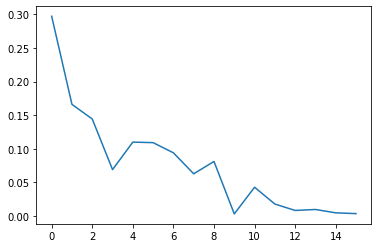

CPU times: user 2min 37s, sys: 1.09 s, total: 2min 38s
Wall time: 2min 38s


In [0]:
%%time
loss_arr = []
loss_epoch_arr = []
epochs = 16

for epoch in range(epochs):

  for i,data in enumerate(trainloader,0):

    inputs,labels = data
    inputs,labels = inputs.to(device),labels.to(device)

    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs,labels)
    loss.backward()

    opt.step()

    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())

  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()
    
